# Exercise 1

Exercise 1 includes a **written assignment** (10 points) and a **programming assignment with 4 problems** (10 points) that you need to solve with programming. For each problem you need to modify the notebook by adding your own programming solutions or written text. Remember to save and commit your changes locally, and push your changes to GitHub after each major change! Regular commits will help you to keep track of your changes (and revert them if needed). Pushing your work to GitHub will ensure that you don't lose any work in case your computer crashes (can happen!).

### Due date

This exercise should be returned to your personal Github repository within two weeks after the first practical session (by Thursday 27.1 at 23:59). Please notice that finishing the programming exercises can take significant amount of time (especially if you don't have yet much programming experience). Hence, it is recommended that you start immediately working on them.

# Exercise 1 - Written assignment (10 points)

In the *Introduction to Sustainability* and *Introduction to Spatial Data Science* lessons this week, we have learned a few basic concepts about sustainable development goals and modern geospatial analytics. 
In this written assignment, the idea is to reflect a bit of the things that we have learned from your own perspective.

## Reflections on sustainability

Write approx. 0.5-2 pages (A4) of text in English where you reflect your own life and thoughts about sustainability. To help you get going, here are some questions that you might touch upon in your text:

 - What does sustainability mean to you?
 - Did your idea / understanding about sustainability evolve somehow after the introductory presentation?
 - Are there (or have there been) some behaviors/actions in your life that you have changed due to sustainability reasons?
 - How do you think that as a *spatial data scientist/engineer* you could help to make a difference in terms of sustainability? 
 E.g. in your current / previous / future job. It does not need to be anything grandiose. Small things matter as well. 

Notice that the above questions are just some examples about the topics that you could write about. 
You do not need to answer them all, and you can also invent your own topics/questions that you want to
write about. The important part is that you start thinking about sustainability and reflect it from your own 
perspective.

----------------

### My reflections

**Add your text here.**

*Hint: To "activate" this cell in Editing mode, double click this cell. If you want to get this cell back in the "Reading-mode", press Shift+Enter.*

## Hints

- If you need help in Markdown formatting (e.g. how to add headings, bold, italics, links etc.), please take a look at this excellent [guide / cheatsheet](https://www.markdownguide.org/cheat-sheet/) 

# Exercise 1 - Programming assignment (10 points)

Exercise 1 includes two problems that you need to solve with programming (+ one extra task which is optional). For each problem you need to modify the notebook by adding your own solutions. Remember to save and commit your changes locally, and push your changes to GitHub after each major change! Regular commits will help you to keep track of your changes (and revert them if needed). Pushing your work to GitHub will ensure that you don't lose any work in case your computer crashes (can happen!).

The purpose of this programming assignment is to familiarize yourself with some basic functionalities of geopandas. 
An overview of the tasks:

 - extract OpenStreetMap data from Helsinki Region
 - make a simple visualization  
 - calculate building density for a given district
 
### Start your exercise in CSC Notebooks

Before you can start programming, you need to launch the CSC Notebook instance and clone your Exercise repository there.
If you need help with this, [read the documentation on the course site](https://sustainability-gis.readthedocs.io/en/latest/lessons/L1/git-basics.html).
 
### Hints 

If there are general questions arising from this exercise, we will add hints to the course website under [Exercise 1 description](https://sustainability-gis.readthedocs.io/en/latest/lessons/L1/exercise-1.html). 


## Problem 1 (5 points)

In the first task you should write code in which you:
 
 - download and initialize OpenStreetMap data reader for Helsinki Region using `pyrosm`
 - Read following datasets from the OSM:
 
   1. Buildings
   2. Roads
   3. Administrative boundary for the city district where you live, e.g. "Otaniemi" (see [pyrosm docs](https://pyrosm.readthedocs.io/en/latest/basics.html#read-boundaries))
 
 - Select the buildings and roads that intersect with the given administrative boundary (district) 
 - Reproject the selected buildings and roads to EPSG:3067 (ETRS-TM35FIN)
 - Visualize the reprojected buildings, roads and the administrative boundary and produce a map that pleases your eye (style is free). 
   - Add a title to your map
   - If you want to use black background you can `import matplotlib.pyplot as plt` and specify `plt.style.use("dark_background")`
   - For example, the output could look like following:
 
![](img/hoods-example.png)
   

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

Unable to revert mtime: /opt/conda/fonts


Downloaded Protobuf data 'Helsinki.osm.pbf' (30.93 MB) to:
'/tmp/pyrosm/Helsinki.osm.pbf'


Text(0.5, 1.0, 'Perkkaa')

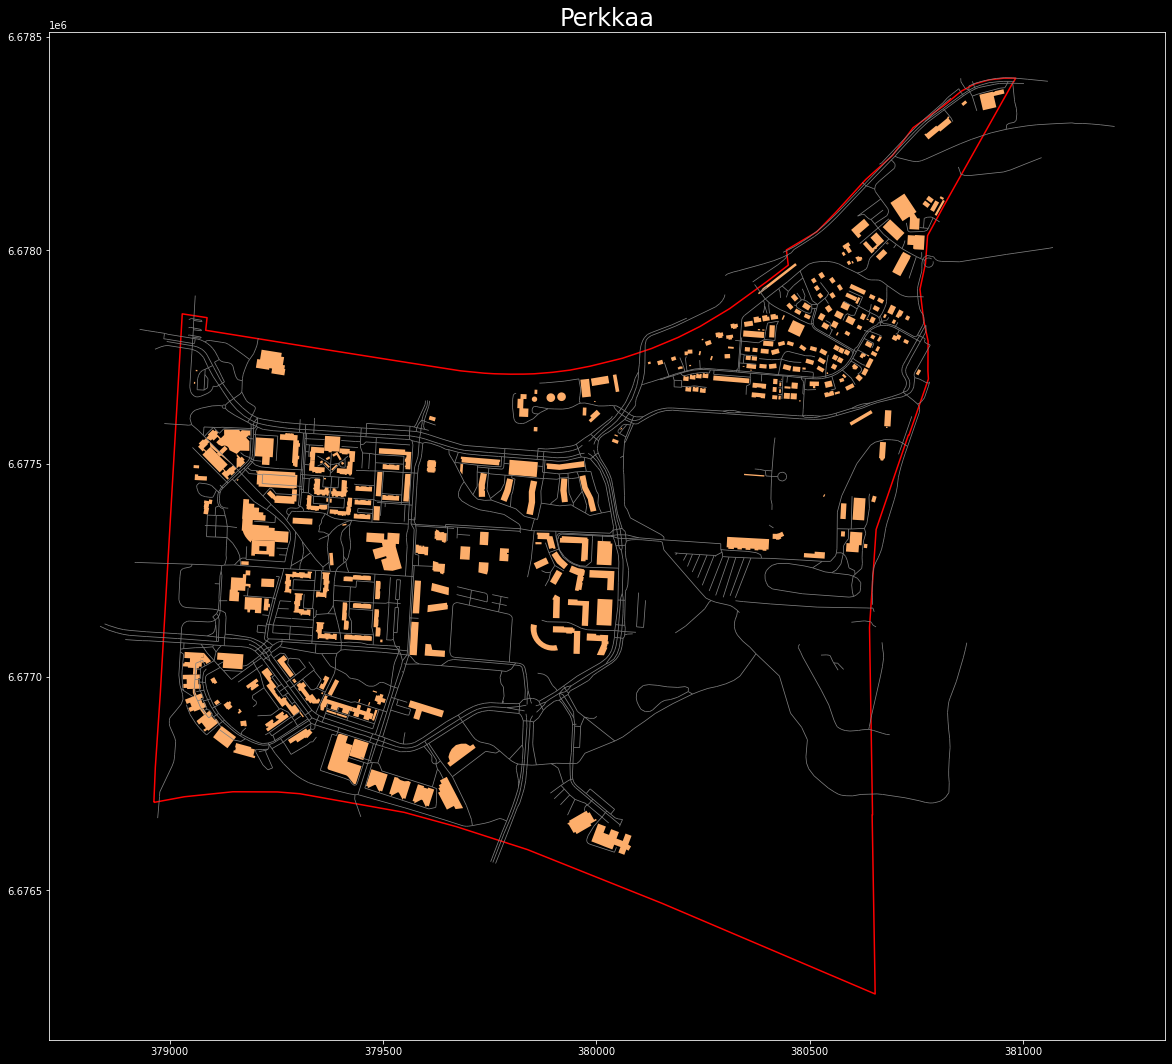

In [1]:
# YOUR CODE HERE
import geopandas as gpd
import pyrosm
import matplotlib.pyplot as plt

plt.style.use("dark_background")

# download and initialize OpenStreetMap data reader for Helsinki Region using pyrosm
fp = pyrosm.get_data("helsinki")
osm = pyrosm.OSM(fp)


# Read following datasets from the OSM:
# Buildings
helsinki_buildings = osm.get_buildings()

# Roads
helsinki_roads = osm.get_network()

# Administrative boundary for the city district where you live
perkkaa_boundary = osm.get_boundaries(name="Perkkaa")


# Select the buildings and roads that intersect with the given administrative boundary (district)
selection_buildings = gpd.sjoin(helsinki_buildings, perkkaa_boundary, "inner", "intersects")
selection_roads = gpd.sjoin(helsinki_roads, perkkaa_boundary, "inner", "intersects")

# Reproject the selected buildings and roads to EPSG:3067 (ETRS-TM35FIN)
projected_buildings = selection_buildings.to_crs(epsg=3067)
projected_roads = selection_roads.to_crs(epsg=3067)
projected_boundary = perkkaa_boundary.to_crs(epsg=3067)

# Visualize the reprojected buildings, roads and the administrative boundary and produce a map.
ax = projected_buildings.plot(facecolor='#fdae6b', figsize=(20,20))
ax = projected_roads.plot(ax=ax, edgecolor="gray", linewidth=0.75)
ax = projected_boundary.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1.5)

# Add a title to your map
plt.title(label="Perkkaa", fontsize=24, color="white")


## Problem 2 (2 points)

Based on the buildings and district GeoDataFrames, calculate the building density for the given district. To do this, you should:

 - Calculate the total area of all buildings within your district
   - Note: Use the buildings and district from Problem 1
 - Divide this total building area by the area of the district
   - the result shows the building density as percentage (i.e. proportion of the land that is allocated for buildings)
 - Print the result for your district to the screen in percentages with 1 decimal point. I.e. it should say something like:
   - "Building density in Ullanlinna is 14.7 %. 

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [36]:
# YOUR CODE HERE

# Calculate the total area of all buildings within Perkkaa district.
projected_buildings["building area"] = projected_buildings.area
total_building_area = projected_buildings["building area"].sum()

# Divide this total building area by the area of the district.
building_density = float(total_building_area / projected_boundary.area)

# Print the result for your district to the screen in percentages with 1 decimal point.
print("Building density in Perkkaa is {:.1f}%".format(building_density*100))


Building density in Perkkaa is 8.2%


## Problem 3 (2 points)

In this problem, your task is to calculate building densities for all districts in Helsinki Region. The end result should like something like following:

![](img/building-densities-HMA.png)

It is possible to extract city districts directly from OpenStreetMap (OSM). In OSM, different administrative levels are tagged with `admin_level` tag (see [docs](https://wiki.openstreetmap.org/wiki/Tag:boundary%3Dadministrative#admin_level)). These admin levels are used in order to render different borders consistently among countries. E.g `admin_level=10` is typically used to render districts, neighborhoods and so on, whereas `admin_level=4` is typically used to draw provinces, regions, federal states etc. These values are country specific, hence, if you work in other countries please take a look at the country specific table from the [OSM docs](https://wiki.openstreetmap.org/wiki/Tag:boundary%3Dadministrative#admin_level). In Finland, `admin_level=10` is used for neighborhoods, hence you can take advantage of that information and extract all the neighborhoods for Helsinki Region.

**Description**:

 1. Read the boundaries for Helsinki Region using `pyrosm` and add `"admin_level"` as an extra attribute for `extra_attributes` -parameter (see docs of pyrosm). This will ensure that the `admin_level` tag is kept as a column in the resulting GeoDataFrame.
 2. Read the buildings for Helsinki Region with `pyrosm`
 3. Select all city districts from the administrative boundaries of Helsinki Region (step 1), i.e. all rows in which the `admin_level` is `"10"` (notice that the number is stored as a string). 
 4. Reproject all city districts and buildings to EPSG 3067
 5. Create a new column called `density` for city districts GeoDataFrame and assign a value 0 to it
 6. Iterate over city districts, calculate the building density (in a similar manner as in Problem 2) and update the result into the `density` column in the city districts GeoDataFrame. The density should be represented as a percentage (0-100) rounding it to 1 decimal.
 7. Visualize the results and add a legend and title for the map as shown in the figure above.


Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

In [3]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

## Problem 4 - How long did it take? Optional feedback (1 point)

To help developing the exercises, and understanding the time that it took for you to finish the Exercise, please provide an estimate of how many hours you spent for doing this exercise? *__Hint:__ To "activate" this cell in Editing mode, double click this cell. If you want to get this cell back in the "Reading-mode", press Shift+Enter.*


I spent approximately this many hours: **X hours**

In addition, if you would like to give any feedback about the exercise (optional), please provide it below:

**My feedback:**